In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [4]:
data=pd.read_csv("Advertising.csv")
data

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [5]:
data.drop(["Unnamed: 0"],axis=1,inplace=True)

In [6]:
data

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [7]:
data.isnull()

,TV,radio,newspaper,sales
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
...,...,...,...,...
195,False,False,False,False
196,False,False,False,False
197,False,False,False,False
198,False,False,False,False


In [8]:
data.isnull().sum()

TV           0
radio        0
newspaper    0
sales        0
dtype: int64

In [9]:
data.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [10]:
data.dtypes

TV           float64
radio        float64
newspaper    float64
sales        float64
dtype: object

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


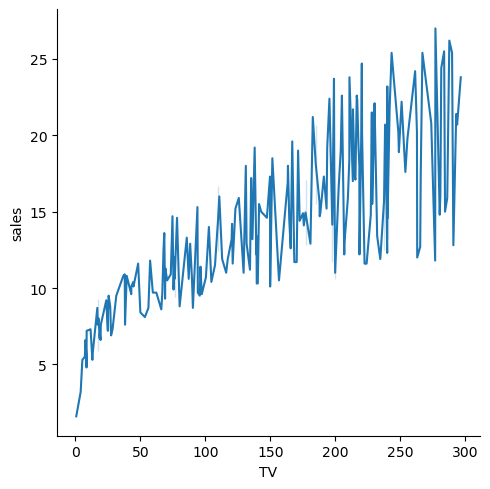

In [12]:
sns.relplot(x="TV",y="sales",kind="line",data=data)

plt.show()

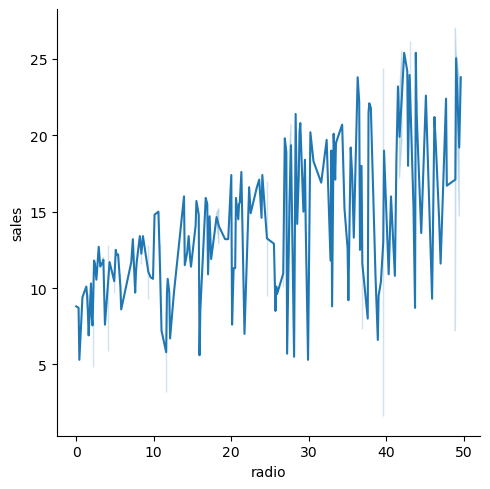

In [13]:
sns.relplot(x="radio",y="sales",kind="line",data=data)

plt.show()

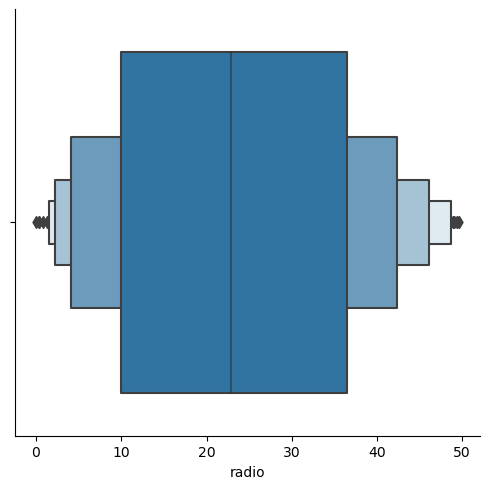

In [14]:
sns.catplot(x="radio",kind="boxen",data=data)   ##box graph
plt.show()

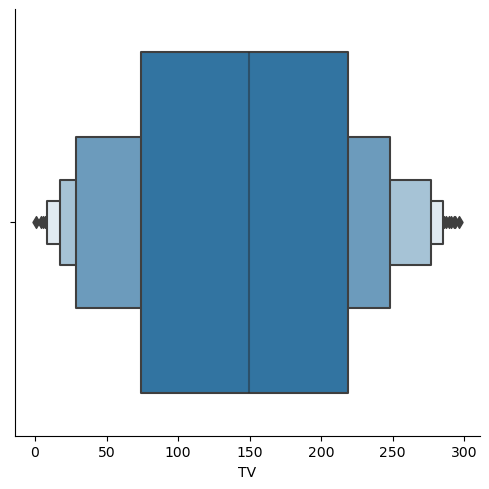

In [15]:
sns.catplot(x="TV",kind="boxen",data=data)   ##box graph  okkkk
plt.show()

In [16]:
data.corr()

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


In [17]:
X=data[["TV","radio","newspaper"]]

In [18]:
X

,TV,radio,newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
...,...,...,...
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2


In [19]:
Y=data["sales"]

In [20]:
Y

0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: sales, Length: 200, dtype: float64

### LinearRegression

In [21]:
model=LinearRegression()

In [22]:
model.fit(X,Y)

LinearRegression()

In [23]:
model.coef_

array([ 0.04576465,  0.18853002, -0.00103749])

In [24]:
model.intercept_

2.9388893694594085

In [25]:
model.predict([[230,37,69]])

array([20.36878143])

In [26]:
model.score(X,Y)*100

89.72106381789521

## Spliting data

In [27]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=20)

In [28]:
model.fit(X_train,Y_train)

LinearRegression()

In [29]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(140, 3)
(60, 3)
(140,)
(60,)


In [30]:
model.coef_

array([ 0.04239408,  0.19456989, -0.00125515])

In [31]:
model.intercept_

3.407990314237381

In [32]:
model.predict([[230,37,69]])

array([20.27110856])

In [33]:
model.score(X_train,Y_train)*100

91.49231325447825

In [34]:
model.score(X_test,Y_test)*100

85.6854287004272

In [35]:
y_pred=model.predict(X_test)

In [36]:
new_df=pd.DataFrame({'Actual':Y_test,'Predicted':y_pred})

In [37]:
new_df

,Actual,Predicted
150,16.1,17.966089
28,18.9,19.199738
13,9.7,9.011107
178,11.8,15.556195
109,19.8,19.462464
168,17.1,17.059227
177,11.7,12.096926
196,9.7,8.344738
47,23.2,21.629759
195,7.6,5.730032


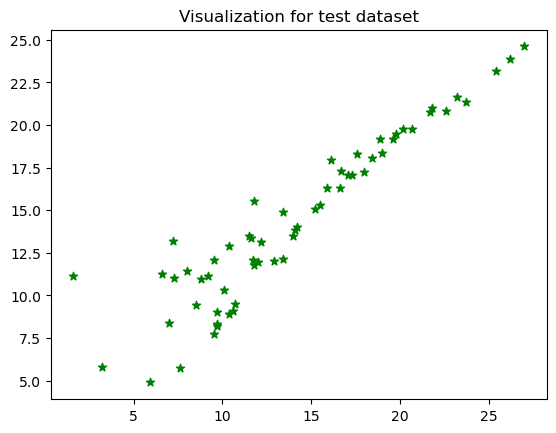

In [38]:
plt.scatter(Y_test,y_pred,color="green",marker="*")
#plt.plot(Y_test,y_pred,color="red")
plt.title("Visualization for test dataset")
plt.show()

## Accuracy

In [39]:
from sklearn.metrics import r2_score

In [40]:
accuracy=r2_score(Y_test, y_pred)*100

In [41]:
print("accuracy of model %.2f"%accuracy) 

accuracy of model 85.69
